In [1]:
import os
import random
import base64
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt
from confluent_kafka import Consumer

In [2]:
#Monitoring Dataset dan Analisis Dataset dari producer

In [3]:
# === Fungsi untuk Monitoring Dataset ===
def monitor_dataset(image_directory, num_samples=5):
    """
    Monitor dataset directory and display random sample images.
    
    Parameters:
    - image_directory (str): Path to the dataset directory.
    - num_samples (int): Number of random images to display.
    """
    image_files = []
    for subdir, dirs, files in os.walk(image_directory):
        for file in files:
            if file.endswith(('png', 'jpg', 'jpeg')):
                image_files.append(os.path.join(subdir, file))
    
    print(f"Total images found: {len(image_files)}")
    
    if len(image_files) == 0:
        print("No images found in the dataset.")
        return

    # Display random samples
    sampled_images = random.sample(image_files, min(num_samples, len(image_files)))
    plt.figure(figsize=(15, 5))
    
    for i, image_path in enumerate(sampled_images):
        try:
            image = Image.open(image_path)
            plt.subplot(1, len(sampled_images), i + 1)
            plt.imshow(image)
            plt.axis('off')
            plt.title(os.path.basename(image_path))
        except Exception as e:
            print(f"Error loading image {image_path}: {e}")
    
    plt.show()

In [4]:
# === Fungsi untuk Analisis Dataset ===
def analyze_dataset(image_directory):
    """
    Analyze dataset to count image formats and sizes.
    """
    formats = {}
    sizes = []
    
    for subdir, dirs, files in os.walk(image_directory):
        for file in files:
            if file.endswith(('png', 'jpg', 'jpeg')):
                try:
                    image_path = os.path.join(subdir, file)
                    image = Image.open(image_path)
                    
                    # Count formats
                    fmt = image.format
                    formats[fmt] = formats.get(fmt, 0) + 1
                    
                    # Record sizes
                    sizes.append(image.size)
                except Exception as e:
                    print(f"Error processing image {file}: {e}")
    
    print("Image Formats Count:")
    for fmt, count in formats.items():
        print(f"{fmt}: {count}")
    
    if sizes:
        avg_width = sum(w for w, h in sizes) // len(sizes)
        avg_height = sum(h for w, h in sizes) // len(sizes)
        print(f"\nTotal Images: {len(sizes)}")
        print(f"Average Size: {avg_width}x{avg_height}")

In [5]:
#Monitoring Dataset Image dari Consumer#

In [6]:
def monitor_consumed_images(consumer, topic, max_messages=5):
    """
    Monitor and analyze images consumed from Kafka topic.

    Parameters:
    - consumer (Consumer): Kafka consumer instance.
    - topic (str): Kafka topic name.
    - max_messages (int): Maximum number of messages to consume.
    """
    consumer.subscribe([topic])
    images = []
    formats = {}

    try:
        print("=== Monitoring Consumed Images ===")
        count = 0
        while count < max_messages:
            msg = consumer.poll(timeout=1.0)
            if msg is None:
                continue
            if msg.error():
                print(f"Consumer error: {msg.error()}")
                continue

            # Decode base64 image
            base64_image = msg.value().decode('utf-8')
            image_data = base64.b64decode(base64_image)
            image = Image.open(BytesIO(image_data))
            images.append(image)

            # Analyze format
            fmt = image.format
            formats[fmt] = formats.get(fmt, 0) + 1

            # Display image
            plt.imshow(image)
            plt.axis('off')
            plt.title(f"Consumed Image {count + 1}")
            plt.show()

            count += 1

        # Print analysis summary
        print("\n=== Analysis of Consumed Images ===")
        print("Image Formats Count:")
        for fmt, count in formats.items():
            print(f"{fmt}: {count}")
        print(f"Total Images Consumed: {len(images)}")

    except KeyboardInterrupt:
        print("Consumer stopped.")
    finally:
        consumer.close()


In [7]:
# === Fungsi untuk Monitoring Konsumsi Gambar dari Kafka ===
def monitor_consumed_images(consumer, topic, max_messages=5):
    """
    Monitor and analyze images consumed from Kafka topic.

    Parameters:
    - consumer (Consumer): Kafka consumer instance.
    - topic (str): Kafka topic name.
    - max_messages (int): Maximum number of messages to consume.
    """
    consumer.subscribe([topic])
    images = []
    formats = {}

    try:
        print("=== Monitoring Consumed Images ===")
        count = 0
        while count < max_messages:
            msg = consumer.poll(timeout=1.0)
            if msg is None:
                continue
            if msg.error():
                print(f"Consumer error: {msg.error()}")
                continue

            try:
                # Decode base64 image
                base64_image = msg.value().decode('utf-8')
                image_data = base64.b64decode(base64_image)
                image = Image.open(BytesIO(image_data))
                images.append(image)

                # Analyze format
                fmt = image.format
                formats[fmt] = formats.get(fmt, 0) + 1

                # Display image
                plt.imshow(image)
                plt.axis('off')
                plt.title(f"Consumed Image {count + 1}")
                plt.show()

                count += 1
            except Exception as e:
                print(f"Error decoding or displaying image: {e}")

        # Print analysis summary
        print("\n=== Analysis of Consumed Images ===")
        print("Image Formats Count:")
        for fmt, count in formats.items():
            print(f"{fmt}: {count}")
        print(f"Total Images Consumed: {len(images)}")

    except KeyboardInterrupt:
        print("Consumer stopped.")
    finally:
        consumer.close()

=== Monitoring Dataset ===
Total images found: 28296


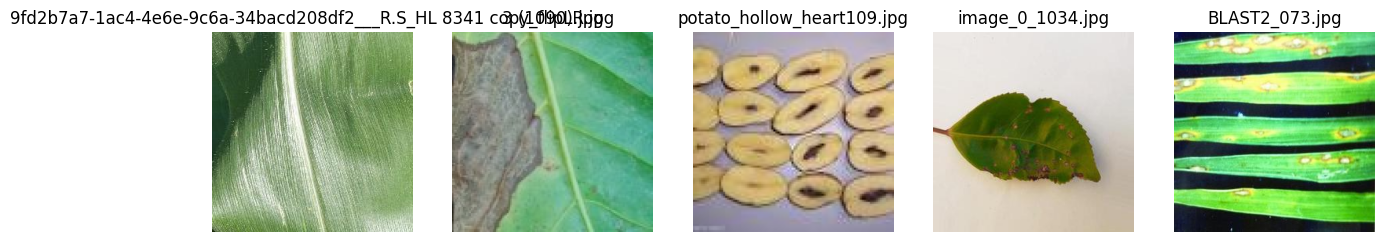


=== Analyzing Local Dataset ===
Image Formats Count:
JPEG: 28294
PNG: 2

Total Images: 28296
Average Size: 294x292

=== Consuming and Monitoring Images from Kafka ===
=== Monitoring Consumed Images ===


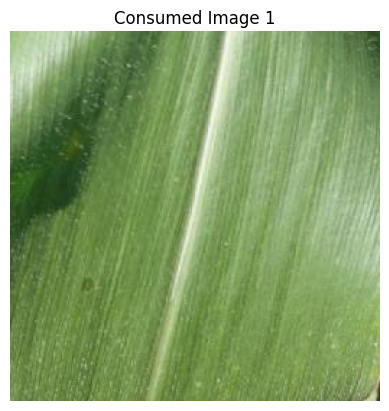

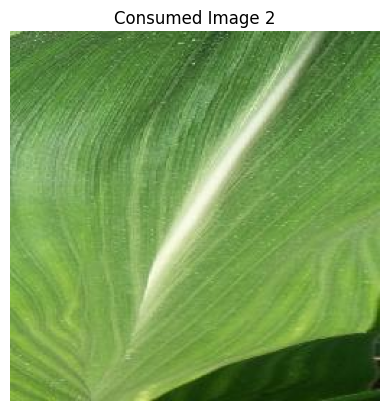

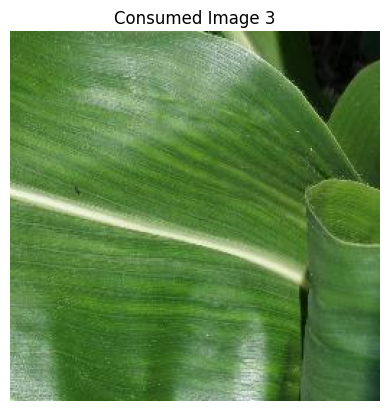

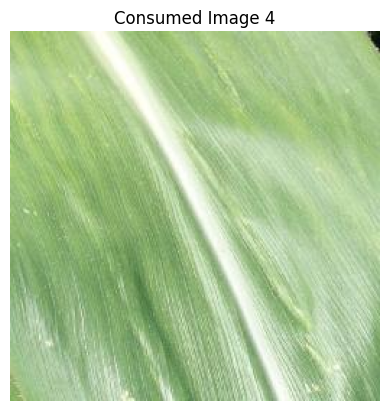

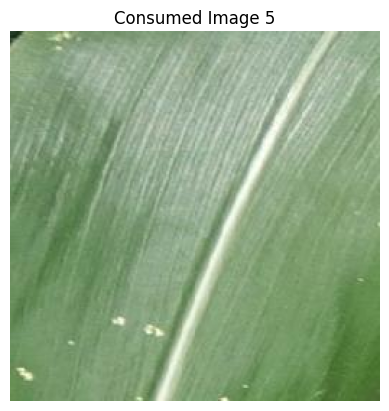


=== Analysis of Consumed Images ===
Image Formats Count:
JPEG: 5
Total Images Consumed: 5


In [8]:
# === Fungsi Membuat Konsumer Kafka ===
def create_consumer():
    """
    Create and configure a Kafka consumer.
    """
    conf = {
        'bootstrap.servers': '3.83.11.185:9092',
        'group.id': 'image-consumer-group',
        'auto.offset.reset': 'earliest',
        'enable.auto.commit': True
    }
    return Consumer(conf)

# === Path Dataset Lokal ===
image_directory = '/home/ubuntu/datasets/dataset/train'

# Monitoring Dataset Lokal
print("=== Monitoring Dataset ===")
monitor_dataset(image_directory, num_samples=5)

# Analisis Dataset Lokal
print("\n=== Analyzing Local Dataset ===")
analyze_dataset(image_directory)

# Konsumsi dan Monitoring dari Kafka
print("\n=== Consuming and Monitoring Images from Kafka ===")
consumer = create_consumer()
monitor_consumed_images(consumer, topic='image-stream', max_messages=5)